In [5]:
!pip install -r requirements-eda.txt

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2d/d5/6227732ecab9165586966ccb54301e3164f61b470c954c4cf6940654fbe1/matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packag


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("fake_job_postings.csv")
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
df["fraudulent"].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

Removing irrelevant columns from analysis and replacing nulls with empty strings

In [10]:
df.drop(columns=["job_id", "salary_range", "telecommuting", "has_company_logo", "has_questions", "department", "required_education"], axis=1, inplace=True)
df.fillna("", inplace=True)

In [31]:
df.nunique()

title                  11231
location                3106
company_profile         1710
description            14802
requirements           11968
benefits                6205
employment_type            6
required_experience        8
industry                 132
function                  38
fraudulent                 2
dtype: int64

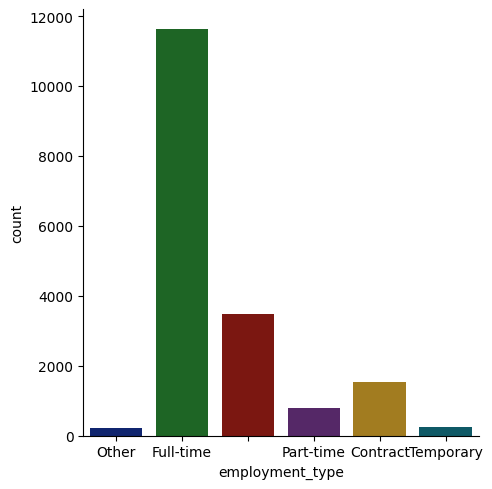

In [33]:
sns.catplot(data=df, kind="count", x="employment_type", hue="employment_type", palette=sns.color_palette("dark6"))

C:\Users\jonat\AppData\Local\Temp\ipykernel_42648\265343947.py:1: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.catplot(data=df, kind="count", x="required_experience", hue="required_experience", palette=sns.color_palette("dark"))


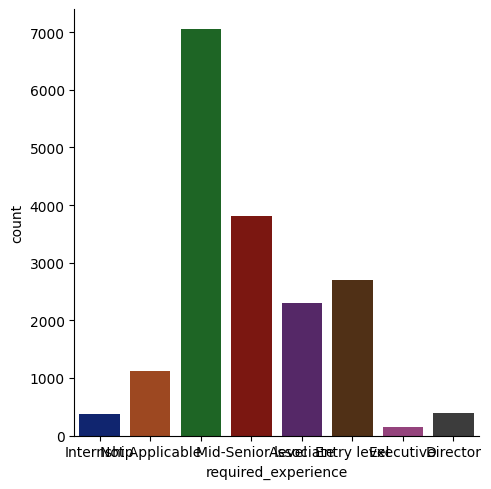

In [41]:
sns.catplot(data=df, kind="count", x="required_experience", hue="required_experience", palette=sns.color_palette("dark"))

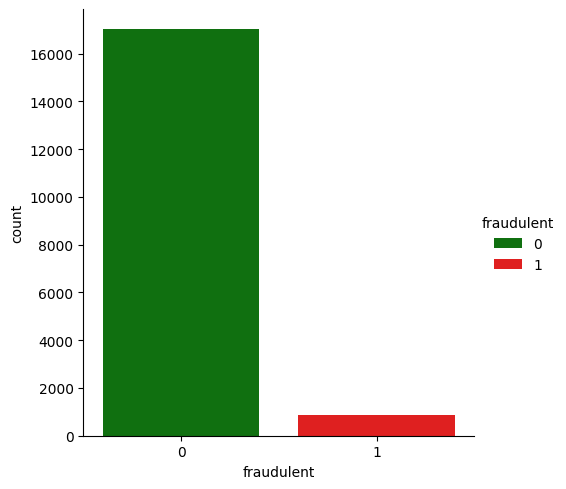

In [27]:
sns.catplot(data=df, kind="count", x="fraudulent", hue="fraudulent", palette= ["green", "red"])